In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")


Numpy: 1.26.1
Pandas: 2.2.3
Seaborn: 0.13.0
Scikit-learn: 1.3.2


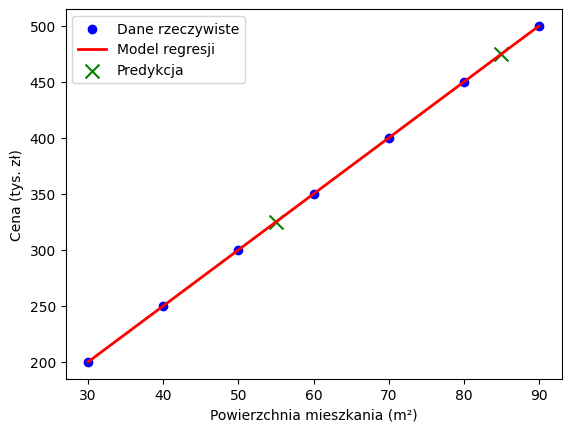

In [3]:

from sklearn.linear_model import LinearRegression

# Dane: powierzchnia mieszkania (m²) i cena (tys. zł)
X = np.array([30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
y = np.array([200, 250, 300, 350, 400, 450, 500])

# Tworzenie modelu
model = LinearRegression()
model.fit(X, y)  # Trenowanie modelu

# Predykcja dla nowych wartości
X_new = np.array([55, 85]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Wizualizacja
plt.scatter(X, y, color='blue', label="Dane rzeczywiste")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Model regresji")
plt.scatter(X_new, y_pred, color='green', marker='x', s=100, label="Predykcja")
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena (tys. zł)")
plt.legend()
plt.show()


In [4]:
X

array([[30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

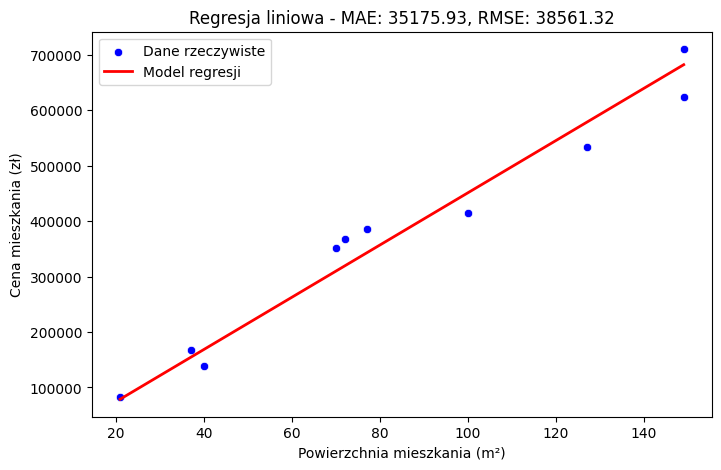

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 📌 1. Generowanie danych - powierzchnia mieszkania i cena
np.random.seed(42)
X = np.random.randint(20, 150, 50).reshape(-1, 1)  # Powierzchnia (m²)
y = X.ravel() * 4500 + np.random.randint(-50000, 50000, 50)  # Cena mieszkania (zł)

# 📌 2. Podział danych na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 3. Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 4. Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# 📌 5. Ocena modelu
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 📌 6. Wizualizacja wyników
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.ravel(), y=y_test, color='blue', label='Dane rzeczywiste')
sns.lineplot(x=X_test.ravel(), y=y_pred, color='red', linewidth=2, label='Model regresji')
plt.xlabel("Powierzchnia mieszkania (m²)")
plt.ylabel("Cena mieszkania (zł)")
plt.legend()
plt.title(f"Regresja liniowa - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.show()

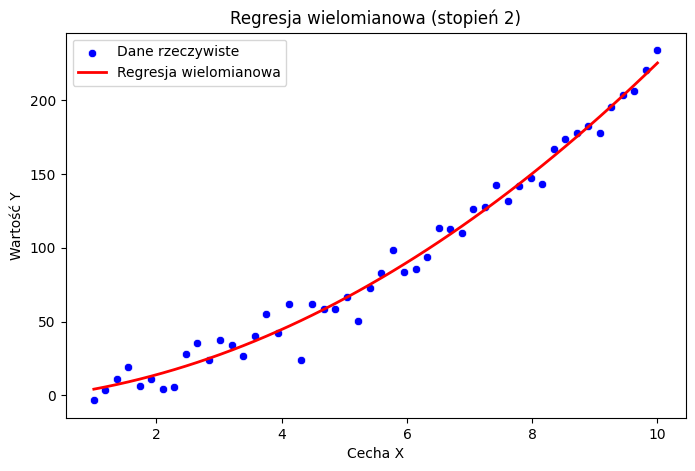

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# 📌 1. Generowanie nieliniowych danych
X = np.linspace(1, 10, 50).reshape(-1, 1)  # Zakres 1-10
y = 2 * X.ravel()**2 + 3 * X.ravel() + np.random.randn(50) * 10  # Funkcja kwadratowa z szumem

# 📌 2. Transformacja na cechy wielomianowe (np. x², x³)
poly = PolynomialFeatures(degree=2)  # Stopień wielomianu = 2
X_poly = poly.fit_transform(X)

# 📌 3. Trenowanie modelu regresji wielomianowej
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# 📌 4. Predykcja na nowych danych
y_pred_poly = model_poly.predict(X_poly)

# 📌 5. Wizualizacja
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.ravel(), y=y, color='blue', label="Dane rzeczywiste")
sns.lineplot(x=X.ravel(), y=y_pred_poly, color='red', linewidth=2, label="Regresja wielomianowa")
plt.xlabel("Cecha X")
plt.ylabel("Wartość Y")
plt.legend()
plt.title("Regresja wielomianowa (stopień 2)")
plt.show()


In [9]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

In [10]:
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [13]:

print(df.head())  
print(df.info())  
print(df.describe()) 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [14]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


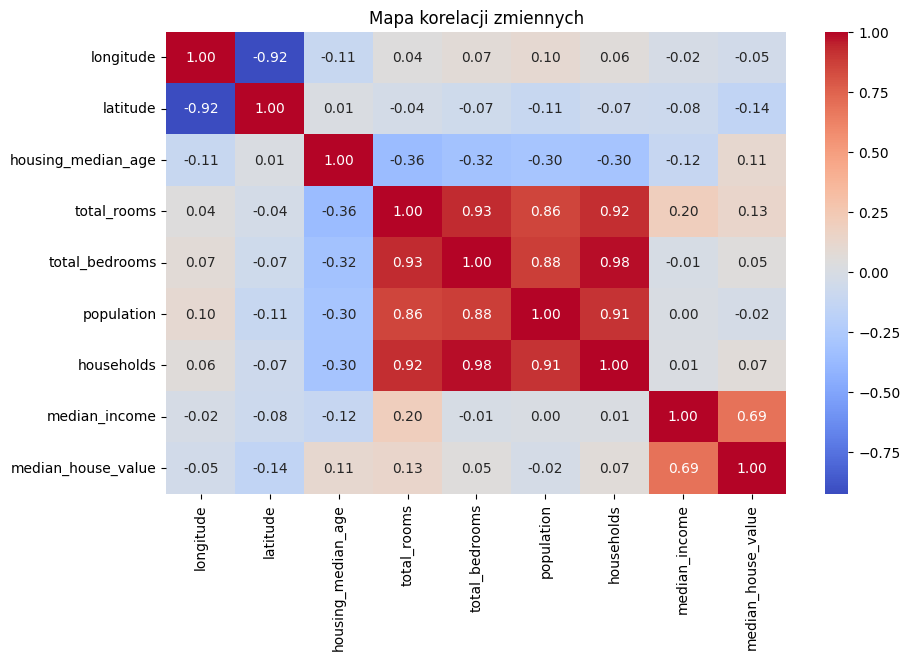

In [18]:

print(df.dtypes)
df_numeric = df.select_dtypes(include=['number'])  # Wybieramy tylko kolumny numeryczne
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa korelacji zmiennych")
plt.show()



In [19]:
df['Building_Type'] = np.random.choice(['Apartment', 'House', 'Loft'], size=len(df))
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  Building_Type  
0     Apartment  
1     Apartment  
2         Hous

In [20]:
df = pd.get_dummies(df, columns=['Building_Type'], drop_first=True)
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   Building_Type_House  Building_Type_Loft  
0                False 

In [27]:
from sklearn.preprocessing import StandardScaler
df = df.drop("ocean_proximity", axis=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            2.129631   
1    0.861439    1.669961       2.332238            1.314156   
2   -0.820777   -0.843637       1.782699            1.258693   
3   -0.766028   -0.733781       0.932968            1.165100   
4   -0.759847   -0.629157      -0.012881            1.172900   

   Building_Type_House  Building_Type_Loft  
0            -0.709498            -0.70118  
1            -0.709498            -0.70118  
2             1.409448       